# Phased Array Parameter Sensitivity Simulation



In [3]:
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf

In [31]:
def plot_touchstone(parameter, i, j, f_min, f_max, extension=".s4p", circuit="Antenna"):
    for k in range(1, 4):
        filename = "touchstone/parameter-" + parameter + "_" + str(k) + extension
        a = rf.Network(filename)
        f_min_indices = np.where(a.frequency.f_scaled >= f_min)[0]
        f_max_indices = np.where(a.frequency.f_scaled <= f_max)[0]
        f_26 = np.where(a.frequency.f_scaled == 26e9)[0]
        min_index = f_min_indices[0]
        max_index = f_max_indices[-1]
        plt.plot(a.frequency.f_scaled[min_index:max_index+1], a.s_db[min_index:max_index+1, i - 1, j - 1], label=parameter + "_" + str(k))
        if circuit == "Antenna":
            print("Central frequency of " + parameter + "_" + str(k) + ": " + str(central_freq(filename, f_min, f_max)))
            print("Bandwidth of " + parameter + "_" + str(k) + ": " + str(bandwidth(filename, f_min, f_max, -10)))
            print("Minimum of " + parameter + "_" + str(k) + ": " + str(np.min(a.s_db[min_index:max_index+1, i - 1, j - 1])))
        elif circuit == "Splitter":
            loss = a.s_db[f_26, i - 1, j - 1]
            phase = a.s_deg[f_26, i - 1, j - 1]
            print("Loss at 26GHz of " + parameter + "_" + str(k) + ": " + str(loss))
            print("Phase at 26GHz of " + parameter + "_" + str(k) + ": " + str(phase))
        else:
            raise ValueError("Invalid circuit type")


def bandwidth(filename, f_min, f_max, dB_threshold, diff=True):
    a = rf.Network(filename)
    bw_f = [f for f, s11 in zip(a.frequency.f_scaled, a.s_db[:, 0, 0]) if s11 < dB_threshold and f_min <= f <= f_max]
    if diff:
        return bw_f[-1] - bw_f[0]
    else:
        return bw_f[-1], bw_f[0]

def central_freq(filename, f_min, f_max):
    a = rf.Network(filename)
    f_min_indices = np.where(a.frequency.f_scaled >= f_min)[0]
    f_max_indices = np.where(a.frequency.f_scaled <= f_max)[0]
    min_index = f_min_indices[0]
    max_index = f_max_indices[-1]
    total_min_index = np.argmin(a.s_db[min_index:max_index+1, 0, 0])
    total_min_freq = a.frequency.f_scaled[total_min_index + min_index]
    return total_min_freq
    

Central frequency of W50_1: 26.2
Bandwidth of W50_1: 1.25
Minimum of W50_1: -19.360881278510753
Central frequency of W50_2: 26.175
Bandwidth of W50_2: 1.2749999999999986
Minimum of W50_2: -17.691677655323854
Central frequency of W50_3: 26.2
Bandwidth of W50_3: 1.2249999999999979
Minimum of W50_3: -21.137278993422
Central frequency of Wsmall_1: 26.2
Bandwidth of Wsmall_1: 1.25
Minimum of Wsmall_1: -19.17831546879382
Central frequency of Wsmall_2: 26.2
Bandwidth of Wsmall_2: 1.2250000000000014
Minimum of Wsmall_2: -20.128132284026332
Central frequency of Wsmall_3: 26.2
Bandwidth of Wsmall_3: 1.25
Minimum of Wsmall_3: -18.321659830624732
Central frequency of er_1: 26.9
Bandwidth of er_1: 1.3249999999999993
Minimum of er_1: -19.18917152268892
Central frequency of er_2: 26.2
Bandwidth of er_2: 1.25
Minimum of er_2: -19.17828386135678
Central frequency of er_3: 25.55
Bandwidth of er_3: 1.1499999999999986
Minimum of er_3: -19.038088985512612
Central frequency of tand_1: 26.2
Bandwidth of tand

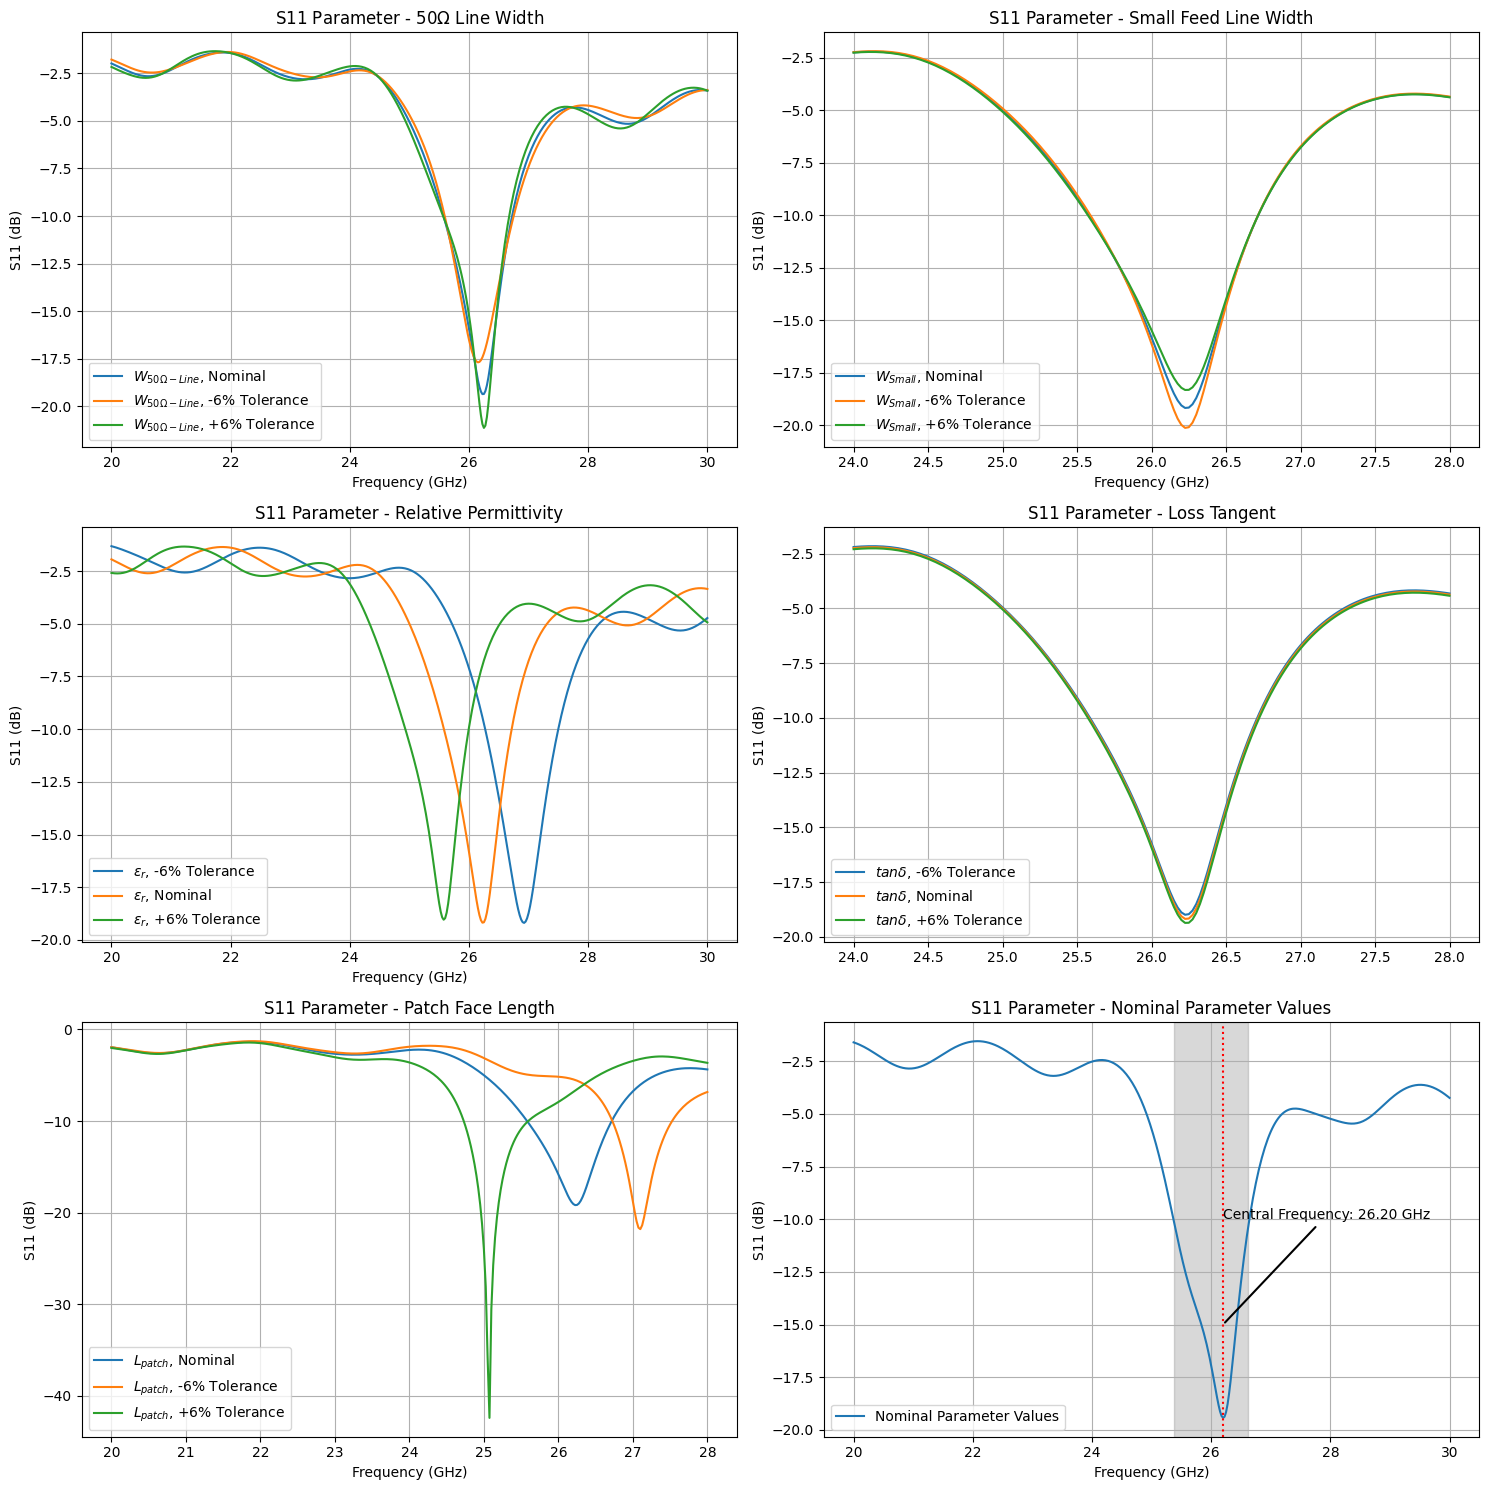

In [5]:
plt.figure(figsize=(15, 15))  # Increase the figure size to accommodate all plots

# Plot S11 parameter for W50
plt.subplot(3, 2, 1)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('W50', 1, 1, 20, 30)
plt.xlabel('Frequency (GHz)')
plt.ylabel('S11 (dB)')
plt.title('S11 Parameter - 50$\\Omega$ Line Width')
plt.grid(True)
plt.legend(['$W_{50\\Omega-Line}$, Nominal', '$W_{50\\Omega-Line}$, -6% Tolerance', '$W_{50\\Omega-Line}$, +6% Tolerance'])

# Plot S11 parameter for Wsmall
plt.subplot(3, 2, 2)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('Wsmall', 1, 1, 24, 28)
plt.xlabel('Frequency (GHz)')
plt.ylabel('S11 (dB)')
plt.title('S11 Parameter - Small Feed Line Width')
plt.grid(True)
plt.legend(['$W_{Small}$, Nominal', '$W_{Small}$, -6% Tolerance', '$W_{Small}$, +6% Tolerance'])

# Plot S11 parameter for er
plt.subplot(3, 2, 3)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('er', 1, 1, 20, 30)
plt.xlabel('Frequency (GHz)')
plt.ylabel('S11 (dB)')
plt.title('S11 Parameter - Relative Permittivity')
plt.grid(True)
plt.legend(['$\\epsilon_r$, -6% Tolerance', '$\\epsilon_r$, Nominal', '$\\epsilon_r$, +6% Tolerance'])

# Plot S11 parameter for tand
plt.subplot(3, 2, 4)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('tand', 1, 1, 24, 28)
plt.ylabel('S11 (dB)')
plt.title('S11 Parameter - Loss Tangent')
plt.grid(True)
plt.legend(['$tan\\delta$, -6% Tolerance', '$tan\\delta$, Nominal', '$tan\\delta$, +6% Tolerance'])

# Plot S11 parameter for patchL
plt.subplot(3, 2, 5)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('patchL', 1, 1, 20, 28)
plt.xlabel('Frequency (GHz)')
plt.ylabel('S11 (dB)')
plt.title('S11 Parameter - Patch Face Length')
plt.grid(True)
plt.legend(['$L_{patch}$, Nominal', '$L_{patch}$, -6% Tolerance', '$L_{patch}$, +6% Tolerance'])

# Plot S11 parameter for patchL
plt.subplot(3, 2, 6)  # Adjust the subplot layout to accommodate all plots
a = rf.Network('touchstone/parameter-W50_1.s4p')
f_min_indices = np.where(a.frequency.f_scaled >= 20)[0]
f_max_indices = np.where(a.frequency.f_scaled <= 30)[0]
min_index = f_min_indices[0]
max_index = f_max_indices[-1]
plt.plot(a.frequency.f_scaled[min_index:max_index+1], a.s_db[min_index:max_index+1, 0, 0])
plt.xlabel('Frequency (GHz)')
plt.ylabel('S11 (dB)')
plt.title('S11 Parameter - Nominal Parameter Values')
plt.grid(True)
plt.legend(['Nominal Parameter Values', '$L_{patch}$, -6% Tolerance', '$L_{patch}$, +6% Tolerance'])
# Annotate minimum value
min_value = np.min(a.s_db[min_index:max_index+1, 0, 0])
# plt.annotate(f'Minimum: {min_value:.2f} dB', xy=(central_freq, min_value), xytext=(central_freq, min_value-5),
#              arrowprops=dict(arrowstyle='->'))

# Annotate central frequency
f_0 = central_freq('touchstone/parameter-W50_1.s4p', 20, 30)
plt.axvline(x=f_0, linestyle=':', color='r')
plt.annotate(f'Central Frequency: {f_0:.2f} GHz', xy=(f_0, -15), xytext=(f_0, -10),
             arrowprops=dict(arrowstyle='-', linewidth=1.5))

# Annotate bandwidth
[f1, f2] = bandwidth('touchstone/parameter-W50_1.s4p', 20, 30, -10, False)
plt.axvspan(f1, f2, alpha=0.3, color='gray')
# plt.annotate(f'Bandwidth: {bw:.2f} GHz', xy=(f_0, -15), xytext=(f_0, -10),
#              arrowprops=dict(arrowstyle='-', linewidth=1.5))

plt.tight_layout()
plt.show()


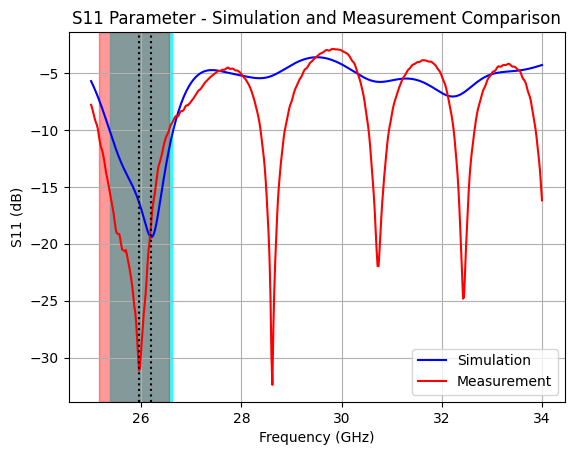

In [148]:
plt.figure()
sim = rf.Network('touchstone/parameter-W50_1.s4p')
meas = rf.Network('touchstone/measurement5.s2p')
f_min_indices = np.where(sim.frequency.f_scaled >= 25)[0]
f_max_indices = np.where(sim.frequency.f_scaled <= 34)[0]
min_index = f_min_indices[0]
max_index = f_max_indices[-1]
min_meas_index = np.where(meas.frequency.f_scaled >= 25e9)[0][0]
max_meas_index = np.where(meas.frequency.f_scaled <= 34e9)[0][-1]
plt.plot(sim.frequency.f_scaled[min_index:max_index+1], sim.s_db[min_index:max_index+1, 0, 0], color='blue')
plt.plot(meas.frequency.f_scaled[min_meas_index:max_meas_index+1] / 10e8, meas.s_db[min_meas_index:max_meas_index+1, 0, 0], color='red')
plt.xlabel('Frequency (GHz)')
plt.ylabel('S11 (dB)')
plt.axvline(x=f_0, linestyle=':', color='black')
plt.axvspan(f1, f2, alpha=0.8, color='cyan')

f_0_m = central_freq('touchstone/measurement5.s2p', 25e9, 28e9)
plt.axvline(x=f_0_m / 10e8, linestyle=':', color='black')
[f1_m, f2_m] = bandwidth('touchstone/measurement5.s2p', 20e9, 28e9, -10, False)
plt.axvspan(f1_m / 10e8, f2_m / 10e8, alpha=0.4, color='red')
plt.title('S11 Parameter - Simulation and Measurement Comparison')
plt.grid(True)
plt.legend(['Simulation', 'Measurement'])

In [103]:
freq_W50 = [central_freq("touchstone/parameter-W50_" + str(k) + ".s4p", 24, 28) for k in range(1, 4)]
freq_Wsmall = [central_freq("touchstone/parameter-Wsmall_" + str(k) + ".s4p", 24, 28) for k in range(1, 4)]
freq_er = [central_freq("touchstone/parameter-er_" + str(k) + ".s4p", 24, 28) for k in range(1, 4)]
freq_tand = [central_freq("touchstone/parameter-tand_" + str(k) + ".s4p", 24, 28) for k in range(1, 4)]
freq_patchL = [central_freq("touchstone/parameter-patchL_" + str(k) + ".s4p", 24, 28) for k in range(1, 4)]

bw_W50 = [bandwidth("touchstone/parameter-W50_" + str(k) + ".s4p", 24, 28, -10) for k in range(1, 4)]
bw_Wsmall = [bandwidth("touchstone/parameter-Wsmall_" + str(k) + ".s4p", 24, 28, -10) for k in range(1, 4)]
bw_er = [bandwidth("touchstone/parameter-er_" + str(k) + ".s4p", 24, 28, -10) for k in range(1, 4)]
bw_tand = [bandwidth("touchstone/parameter-tand_" + str(k) + ".s4p", 24, 28, -10) for k in range(1, 4)]
bw_patchL = [bandwidth("touchstone/parameter-patchL_" + str(k) + ".s4p", 24, 28, -10) for k in range(1, 4)]

minimum_W50 = [np.min(rf.Network("touchstone/parameter-W50_" + str(k) + ".s4p").s_db[:, 0, 0]) for k in range(1, 4)]
minimum_Wsmall = [np.min(rf.Network("touchstone/parameter-Wsmall_" + str(k) + ".s4p").s_db[:, 0, 0]) for k in range(1, 4)]
minimum_er = [np.min(rf.Network("touchstone/parameter-er_" + str(k) + ".s4p").s_db[:, 0, 0]) for k in range(1, 4)]
minimum_tand = [np.min(rf.Network("touchstone/parameter-tand_" + str(k) + ".s4p").s_db[:, 0, 0]) for k in range(1, 4)]
minimum_patchL = [np.min(rf.Network("touchstone/parameter-patchL_" + str(k) + ".s4p").s_db[:, 0, 0]) for k in range(1, 4)]

std_freq_W50 = np.std(freq_W50)
std_freq_Wsmall = np.std(freq_Wsmall)
std_freq_er = np.std(freq_er)
std_freq_tand = np.std(freq_tand)
std_freq_patchL = np.std(freq_patchL)

std_bw_W50 = np.std(bw_W50)
std_bw_Wsmall = np.std(bw_Wsmall)
std_bw_er = np.std(bw_er)
std_bw_tand = np.std(bw_tand)
std_bw_patchL = np.std(bw_patchL)

std_minimum_W50 = np.std(minimum_W50)
std_minimum_Wsmall = np.std(minimum_Wsmall)
std_minimum_er = np.std(minimum_er)
std_minimum_tand = np.std(minimum_tand)
std_minimum_patchL = np.std(minimum_patchL)

print("Standard deviation of central frequency of W50: " + str(std_freq_W50))
print("Standard deviation of central frequency of Wsmall: " + str(std_freq_Wsmall))
print("Standard deviation of central frequency of er: " + str(std_freq_er))
print("Standard deviation of central frequency of tand: " + str(std_freq_tand))
print("Standard deviation of central frequency of patchL: " + str(std_freq_patchL))

print("Standard deviation of bandwidth of W50: " + str(std_bw_W50))
print("Standard deviation of bandwidth of Wsmall: " + str(std_bw_Wsmall))
print("Standard deviation of bandwidth of er: " + str(std_bw_er))
print("Standard deviation of bandwidth of tand: " + str(std_bw_tand))
print("Standard deviation of bandwidth of patchL: " + str(std_bw_patchL))

print("Standard deviation of minimum of W50: " + str(std_minimum_W50))
print("Standard deviation of minimum of Wsmall: " + str(std_minimum_Wsmall))
print("Standard deviation of minimum of er: " + str(std_minimum_er))
print("Standard deviation of minimum of tand: " + str(std_minimum_tand))
print("Standard deviation of minimum of patchL: " + str(std_minimum_patchL))

Uc_freq = np.sqrt(std_freq_W50**2 + std_freq_Wsmall**2 + std_freq_er**2 + std_freq_tand**2 + std_freq_patchL**2)
Uc_bw = np.sqrt(std_bw_W50**2 + std_bw_Wsmall**2 + std_bw_er**2 + std_bw_tand**2 + std_bw_patchL**2)
Uc_min = np.sqrt(std_minimum_W50**2 + std_minimum_Wsmall**2 + std_minimum_er**2 + std_minimum_tand**2 + std_minimum_patchL**2)

print("Combined standard deviation of central frequency: " + str(Uc_freq))
print("Combined standard deviation of bandwidth: " + str(Uc_bw))
print("Combined standard deviation of minimum: " + str(Uc_min) + "\n")



Standard deviation of central frequency of W50: 0.011785113019775122
Standard deviation of central frequency of Wsmall: 0.0
Standard deviation of central frequency of er: 0.5512611802847067
Standard deviation of central frequency of tand: 0.0
Standard deviation of central frequency of patchL: 0.8233569497287714
Standard deviation of bandwidth of W50: 0.02041241452319344
Standard deviation of bandwidth of Wsmall: 0.011785113019775122
Standard deviation of bandwidth of er: 0.07168604389202222
Standard deviation of bandwidth of tand: 0.011785113019775122
Standard deviation of bandwidth of patchL: 0.2435273199367071
Standard deviation of minimum of W50: 2.0973542334202064
Standard deviation of minimum of Wsmall: 0.7896527619830095
Standard deviation of minimum of er: 0.35037951832242986
Standard deviation of minimum of tand: 0.1530485508203205
Standard deviation of minimum of patchL: 4.152691362627069
Combined standard deviation of central frequency: 0.9909310997463161
Combined standard de

| **Uncertainty <br>Source** | **Frequency<br>Uncertainty (GHz)** | **Bandwidth<br>Uncertainty (GHz)** | **S11 Amplitude<br>Uncertainty (dB)** |
| -------------------------- | ---------------------------------- | ---------------------------------- | ------------------------------------- |
| 50Ω Line Width             | 0.0117                             | 0.0204                             | 2.0973                                |
| Feed Line Width            | 0.0                                | 0.0117                             | 0.7896                                |
| Rogers $\epsilon_r$        | 0.5512                             | 0.0716                             | 0.3503                                |
| Rogers $tan\delta$         | 0.0                                | 0.0117                             | 0.1530                                |
| Patch Face Width           | 0.8233                             | 0.2435                             | 4.1526                                |
| **Combined**               | **0.9909**                         | **0.2552**                         | **4.7342**                            |

In [17]:
import numpy as np

### Uncertainty Measurements - 5 For each uncertainty
### for S-Parameters of the phased array antenna
# 1. Cable Positioning/Bending
s11_cable = [-21.3, -21.08, -21.22, -20.18, -20.42]

# 2. Connector Mating
s11_connector = [-20.97, -21.29, -22.22, -22.45, -22.48]

# 3. Material around the antenna
s11_material = [-22.66, -22.08, -23.05, -23.18, -23.2]

# 4. Measurement Time
s11_time = [-28.97, -28.9, -28.96, -28.28, -29.05]

# 5. Operator Uncertainty
s11_operator = [-24.48, -25.19, -25.98, -27.19, -27.76]

# Calculate the standard deviations
std_cable = np.std(s11_cable)
std_connector = np.std(s11_connector)
std_material = np.std(s11_material)
std_time = np.std(s11_time)
std_operator = np.std(s11_operator)

# Print the standard deviations
print("Standard Deviation - Cable Positioning/Bending:", std_cable)
print("Standard Deviation - Connector Mating:", std_connector)
print("Standard Deviation - Material around the antenna:", std_material)
print("Standard Deviation - Measurement Time:", std_time)
print("Standard Deviation - Operator Uncertainty:", std_operator)

Uc = np.sqrt(std_cable**2 + std_connector**2 + std_material**2 + std_time**2 + std_operator**2)
print(f"Combined Uncertainty: {Uc} dB")

# For n=5, k = 95.45%, t = 2.65
Uc_corrected = Uc * 2.65
print(f"Expanded Uncertainty (Account for limited measurement samples): {Uc_corrected} dB")


Standard Deviation - Cable Positioning/Bending: 0.45290175535098076
Standard Deviation - Connector Mating: 0.628757504925389
Standard Deviation - Material around the antenna: 0.424056599995803
Standard Deviation - Measurement Time: 0.28009998214923143
Standard Deviation - Operator Uncertainty: 1.2172592164366638
Combined Uncertainty: 1.5298548950799227 dB
Combined Uncertainty (Account for limited measurement samples): 4.054115471961795 dB


# Antenna Uncertainty Budget - Measurements

| **Uncertainty <br>Source** | **Evaluation <br>Type** | **Probability <br>Function** | **Standard<br>Uncertainty (dB)** |
| -------------------------- | ----------------------- | ---------------------------- | -------------------------------- |
| Cable Positioning/Bending  | Measurement             | Gaussian                     | 0.4529                           |
| Connector Mating           | Measurement             | Gaussian                     | 0.6287                           |
| Environment Material       | Measurement             | Gaussian                     | 0.4240                           |
| Measurement Time           | Measurement             | Gaussian                     | 0.2801                           |
| Operator Uncertainty       | Measurement             | Gaussian                     | 1.2172                           |
| **Combined**               |                         |                              | **1.5298**                       |
| **Expanded (k = 5)**       |                         |                              | **4.0541**                       |




# ADS Simulation Results

Loss at 26GHz of subH_split_1: [-7.36642092]
Phase at 26GHz of subH_split_1: [36.1171481]
Loss at 26GHz of subH_split_2: [-7.38165123]
Phase at 26GHz of subH_split_2: [17.6586957]
Loss at 26GHz of subH_split_3: [-7.37241031]
Phase at 26GHz of subH_split_3: [27.3171078]
Loss at 26GHz of tand_split_1: [-7.44755035]
Phase at 26GHz of tand_split_1: [28.4020573]
Loss at 26GHz of tand_split_2: [-7.29733312]
Phase at 26GHz of tand_split_2: [26.232864]
Loss at 26GHz of tand_split_3: [-7.37241031]
Phase at 26GHz of tand_split_3: [27.3171078]
Loss at 26GHz of er_split_1: [-7.36440452]
Phase at 26GHz of er_split_1: [-100.62888]
Loss at 26GHz of er_split_2: [-7.75014513]
Phase at 26GHz of er_split_2: [161.541661]
Loss at 26GHz of er_split_3: [-7.37241031]
Phase at 26GHz of er_split_3: [27.3171078]
Loss at 26GHz of lineW_split_1: [-7.3894224]
Phase at 26GHz of lineW_split_1: [12.4195426]
Loss at 26GHz of lineW_split_2: [-7.35415524]
Phase at 26GHz of lineW_split_2: [42.6897253]
Loss at 26GHz of lin

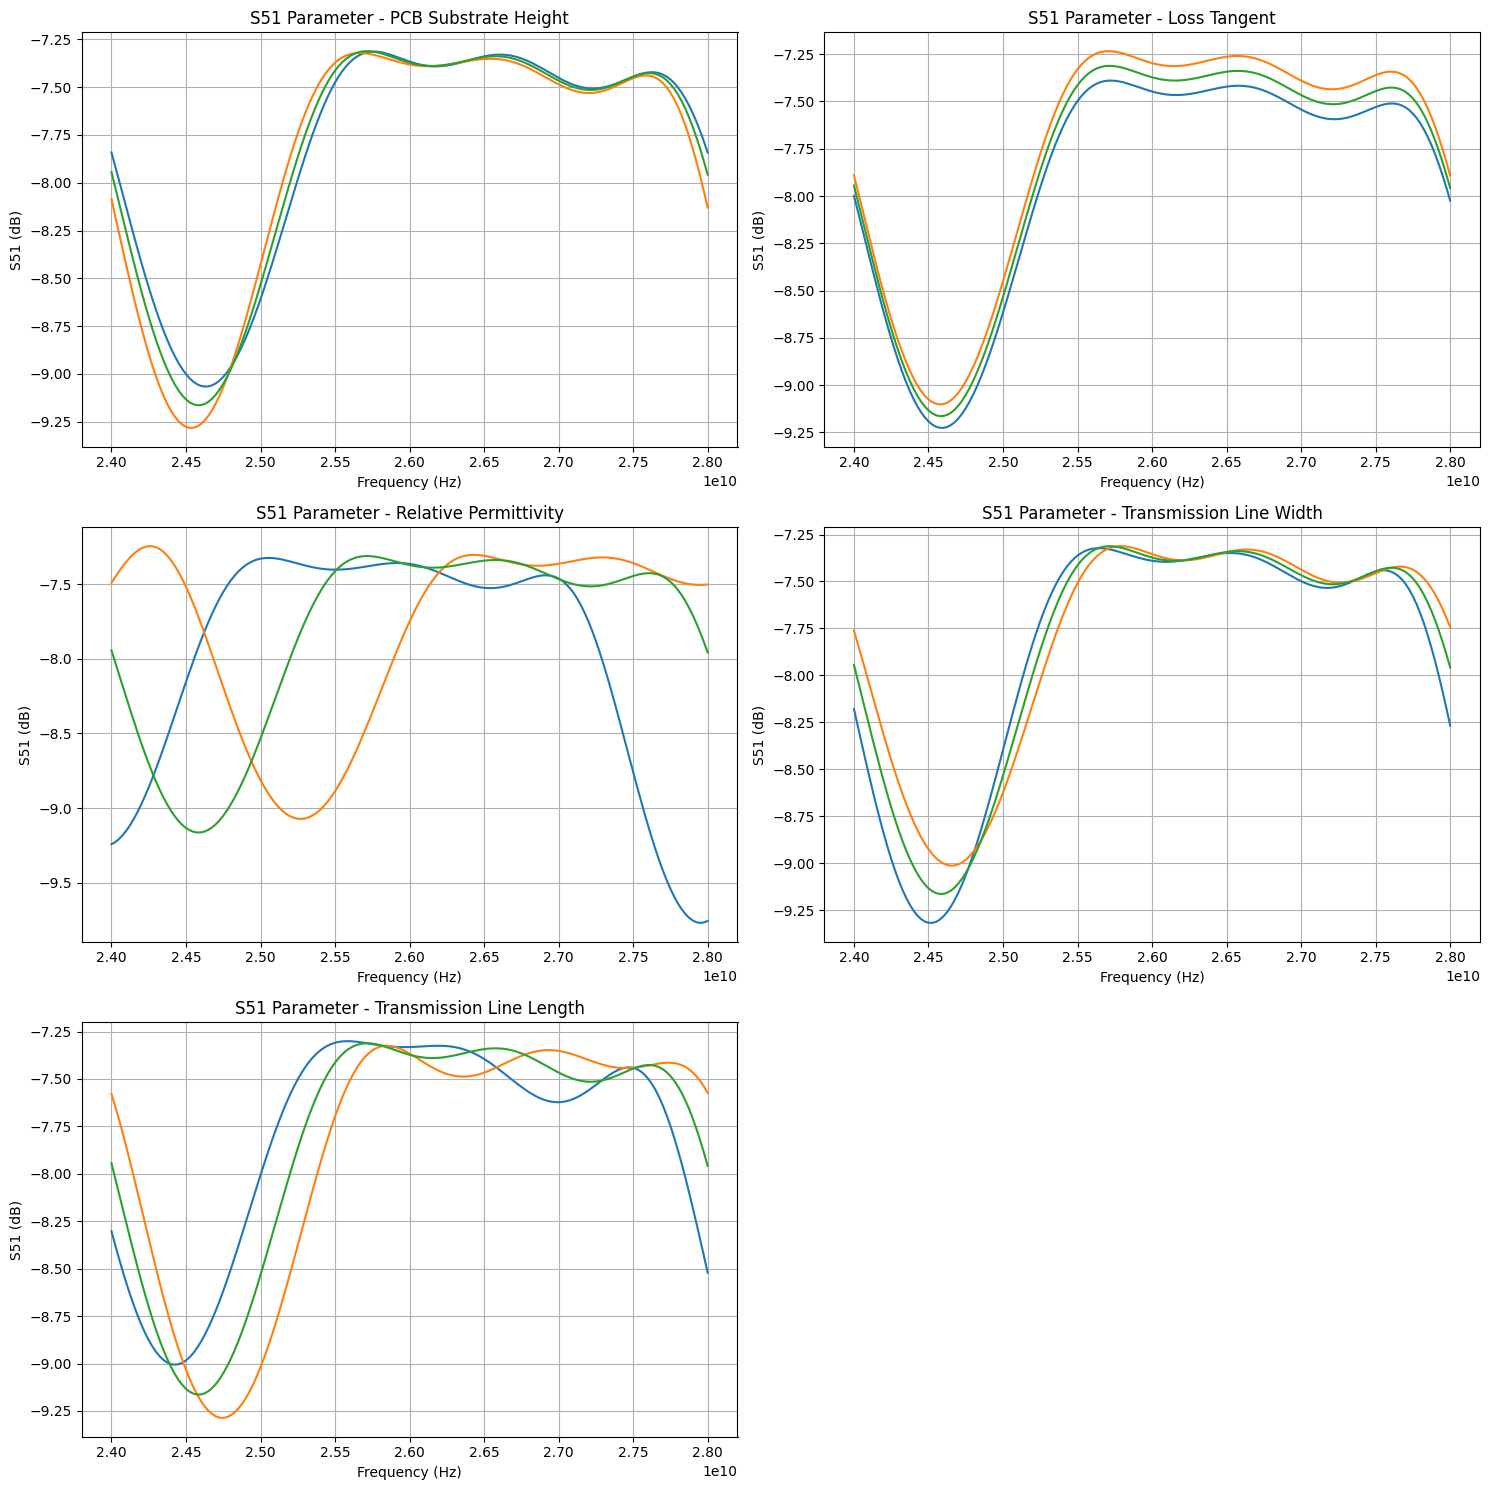

In [36]:
plt.figure(figsize=(15, 15))  # Increase the figure size to accommodate all plots

# Plot S11 parameter for W50
plt.subplot(3, 2, 1)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('subH_split', 5, 1, 24e9, 28e9, extension=".s5p", circuit="Splitter")
plt.xlabel('Frequency (Hz)')
plt.ylabel('S51 (dB)')
plt.title('S51 Parameter - PCB Substrate Height')
plt.grid(True)

# Plot S11 parameter for W50
plt.subplot(3, 2, 2)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('tand_split', 5, 1, 24e9, 28e9, extension=".s5p", circuit="Splitter")
plt.xlabel('Frequency (Hz)')
plt.ylabel('S51 (dB)')
plt.title('S51 Parameter - Loss Tangent')
plt.grid(True)

# Plot S11 parameter for W50
plt.subplot(3, 2, 3)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('er_split', 5, 1, 24e9, 28e9, extension=".s5p", circuit="Splitter")
plt.xlabel('Frequency (Hz)')
plt.ylabel('S51 (dB)')
plt.title('S51 Parameter - Relative Permittivity')
plt.grid(True)

# Plot S11 parameter for W50
plt.subplot(3, 2, 4)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('lineW_split', 5, 1, 24e9, 28e9, extension=".s5p", circuit="Splitter")
plt.xlabel('Frequency (Hz)')
plt.ylabel('S51 (dB)')
plt.title('S51 Parameter - Transmission Line Width')
plt.grid(True)

# Plot S11 parameter for W50
plt.subplot(3, 2, 5)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('lineL_split', 5, 1, 24e9, 28e9, extension=".s5p", circuit="Splitter")
plt.xlabel('Frequency (Hz)')
plt.ylabel('S51 (dB)')
plt.title('S51 Parameter - Transmission Line Length')
plt.grid(True)

plt.tight_layout()
plt.show()
